# Chat Auswertung
___

In [1]:
from __future__ import unicode_literals
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
import datetime
import common.chat
import common.live

In [2]:
#config
reload(sys)
sys.setdefaultencoding('utf-8')
matplotlib.style.use('ggplot')
%matplotlib inline

#constants
CHAT_DATA_DIRECTORY = '/home/marcel/Development/rbtvdata/chat'
LIVE_DATA_DIRECTORY = '/home/marcel/Development/rbtvdata/live'

#chat duell dates
chatDuellDates1 = ['2015-12-01', '2015-12-08', '2015-12-15', '2015-12-15', '2015-12-22', '2016-01-12', '2016-02-02', '2016-02-09', '2016-02-16', '2016-02-23', '2016-03-01', '2016-03-08', '2016-03-15']
chatDuellDates2 = ['2016-06-28', '2016-07-05', '2016-07-12', '2016-07-19', '2016-07-26', '2016-08-02', '2016-08-09', '2016-08-23', '2016-08-30', '2016-09-06', '2016-09-13', '2016-09-20', '2016-09-27', '2016-10-04']

## Chat Daten
___

In [3]:
#load chat data
chat = common.chat.load(CHAT_DATA_DIRECTORY)

#create additional columns
chat['day'] = chat.index.date

In [4]:
#group chat data by date
chatGrouped = chat.groupby('day')

#count messages
chatMessages = chatGrouped.size().to_frame('messages')

#adjust data type
chatMessages = chatMessages.set_index(pd.to_datetime(chatMessages.index, format='%Y-%m-%d'))

#resample
chatMessages = chatMessages.resample('1D').mean().fillna(float('NaN'))

#30-day mean
chatMessages['messages_30d_mean'] = chatMessages.rolling(window=30, min_periods=1).mean()

In [5]:
#group chat data by date
chatGrouped = chat.groupby('day')

#count (unique) users
chatParticipants = chatGrouped.agg({'username': pd.Series.nunique})
chatParticipants.columns = ['participants']

#adjust data type
chatParticipants = chatParticipants.set_index(pd.to_datetime(chatParticipants.index, format='%Y-%m-%d'))

#resample
chatParticipants = chatParticipants.resample('1D').mean().fillna(float('NaN'))

#30-day mean
chatParticipants['participants_30d_mean'] = chatParticipants.rolling(window=30, min_periods=1).mean()

## Live Daten
___

In [6]:
#load live data
live = common.live.load(LIVE_DATA_DIRECTORY)

#create additional column
live['day'] = live.index.date

In [7]:
#group live data by date
liveGrouped = live.groupby('day')

#calculate mean for each day
liveMean = liveGrouped.apply(lambda group: group['viewers'].mean())
liveMean = liveMean.to_frame('viewers')

#adjust data type
liveMean = liveMean.set_index(pd.to_datetime(liveMean.index, format='%Y-%m-%d'))

#30-day mean
liveMean['viewers_30d_mean'] = liveMean.rolling(window=30, min_periods=1).mean()

## Diagramme
___

In [8]:
#join chat data
joinedChatData = liveMean.join(chatMessages).join(chatParticipants)

#participants/viewers ratio
joinedChatData['ratio'] = joinedChatData['participants'] / joinedChatData['viewers']

#30-day mean
joinedChatData['ratio_30d_mean'] = joinedChatData['ratio'].rolling(window=30, min_periods=1).mean()

joinedChatData

,viewers,viewers_30d_mean,messages,messages_30d_mean,participants,participants_30d_mean,ratio,ratio_30d_mean
day,,,,,,,,
2015-01-15,39952.809155,39952.809155,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-16,15516.815972,27734.812564,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-17,10779.276811,22082.967313,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-18,9721.064583,18992.491630,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-19,9326.186453,17059.230595,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-20,10493.045326,15964.866383,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-21,12030.206944,15402.772178,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-22,11261.631944,14885.129649,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-23,10431.520139,14390.284147,NaN,NaN,NaN,NaN,NaN,NaN


(0, 140000.0)

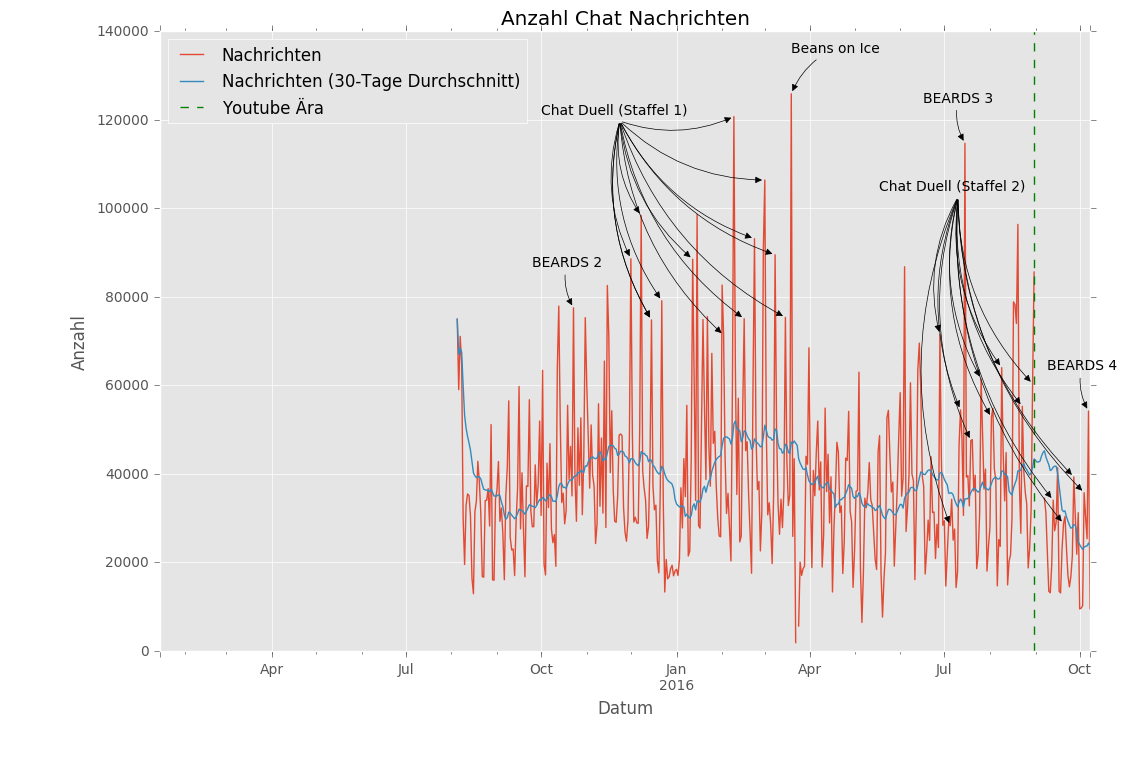

In [9]:
plot = joinedChatData[['messages', 'messages_30d_mean']].plot(figsize=(12, 8), title='Anzahl Chat Nachrichten')
plot.set_xlabel('Datum')
plot.set_ylabel('Anzahl')

plot.axvline(datetime.datetime(2016, 8, 31, 23, 59, 59), color='g', linestyle='--', label='Youtube Ära')

legend = plot.legend(loc=2)
legend.get_texts()[0].set_text('Nachrichten')
legend.get_texts()[1].set_text('Nachrichten (30-Tage Durchschnitt)')


arrowStyle = dict(arrowstyle="-|>",
                  connectionstyle='arc3,rad=0.2',
                  linewidth = 0.5,
                  color = 'black')

#annotate chat duell (season 1)
plot.annotate('Chat Duell (Staffel 1)', xy=(0.48, 0.85), xycoords='figure fraction')
for date in chatDuellDates1:
    datapoint = joinedChatData.loc[date]
    plot.annotate('', 
                  xy=(date, datapoint['messages']), xycoords='data', 
                  xytext=(0.55, 0.84), textcoords='figure fraction',
                  arrowprops=arrowStyle)

#annotate chat duell (season 2)
plot.annotate('Chat Duell (Staffel 2)', xy=(0.78, 0.75), xycoords='figure fraction')
for date in chatDuellDates2:
    datapoint = joinedChatData.loc[date]
    plot.annotate('', 
                  xy=(date, datapoint['messages']), xycoords='data', 
                  xytext=(0.85, 0.74), textcoords='figure fraction',
                  arrowprops=arrowStyle)

#annotate beans on rice
date = '2016-03-19'
datapoint = joinedChatData.loc[date]
plot.annotate('Beans on Ice', 
              xy=(date, datapoint['messages']), xycoords='data', 
              xytext=(0, 30), textcoords='offset points',
              arrowprops=arrowStyle)

#annotate beards
date = '2015-10-23'
datapoint = joinedChatData.loc[date]
plot.annotate('BEARDS 2', 
              xy=(date, datapoint['messages']), xycoords='data', 
              xytext=(-30, 30), textcoords='offset points',
              arrowprops=arrowStyle)

date = '2016-07-15'
datapoint = joinedChatData.loc[date]
plot.annotate('BEARDS 3', 
              xy=(date, datapoint['messages']), xycoords='data', 
              xytext=(-30, 30), textcoords='offset points',
              arrowprops=arrowStyle)

date = '2016-10-07'
datapoint = joinedChatData.loc[date]
plot.annotate('BEARDS 4', 
              xy=(date, datapoint['messages']), xycoords='data', 
              xytext=(-30, 30), textcoords='offset points',
              arrowprops=arrowStyle)

plt.ylim(ymin=0)

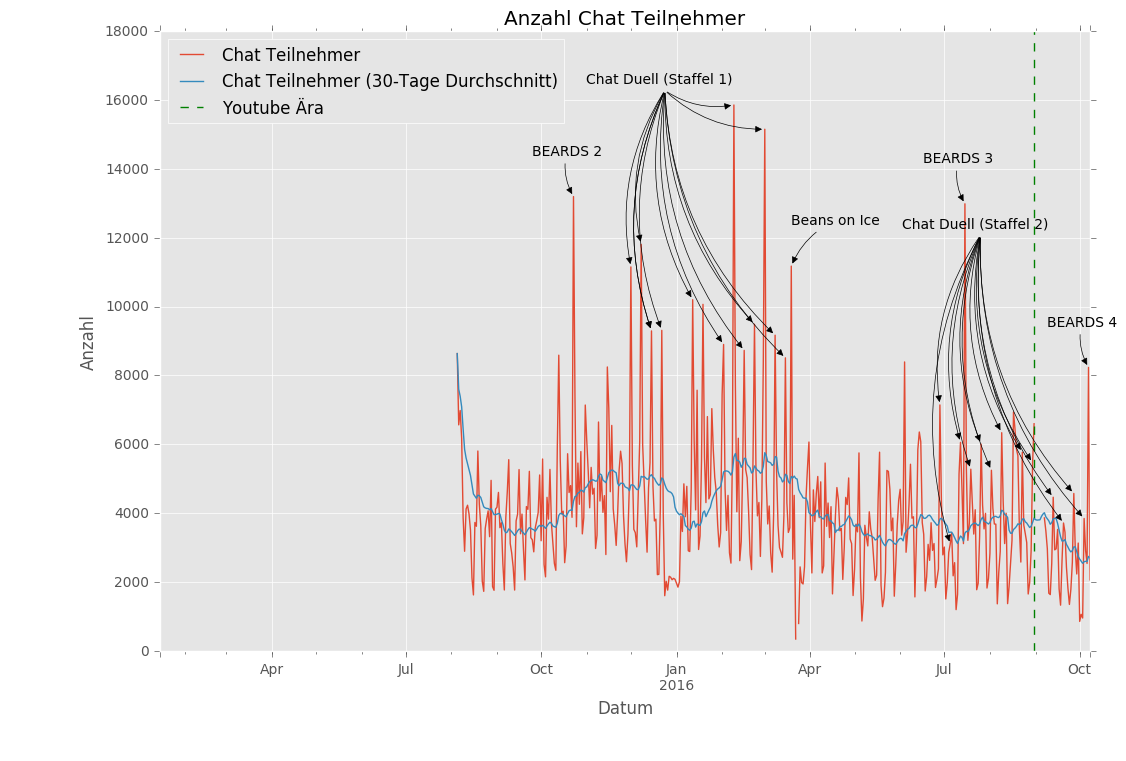

In [10]:
plot = joinedChatData[['participants', 'participants_30d_mean']].plot(kind='line', figsize=(12, 8), title='Anzahl Chat Teilnehmer')
plot.set_xlabel('Datum')
plot.set_ylabel('Anzahl')

plot.axvline(datetime.datetime(2016, 8, 31, 23, 59, 59), color='g', linestyle='--', label='Youtube Ära')

legend = plot.legend(loc=0)
legend.get_texts()[0].set_text('Chat Teilnehmer')
legend.get_texts()[1].set_text('Chat Teilnehmer (30-Tage Durchschnitt)')

plt.ylim(ymin=0)
plt.ylim(ymax=18000)

arrowStyle = dict(arrowstyle="-|>",
                  connectionstyle='arc3,rad=0.2',
                  linewidth = 0.5,
                  color = 'black')

#annotate chat duell (season 1)
plot.annotate('Chat Duell (Staffel 1)', xy=(0.52, 0.89), xycoords='figure fraction')
for date in chatDuellDates1:
    datapoint = joinedChatData.loc[date]
    plot.annotate('', 
                  xy=(date, datapoint['participants']), xycoords='data', 
                  xytext=(0.59, 0.88), textcoords='figure fraction',
                  arrowprops=arrowStyle)

#annotate chat duell (season 2)
plot.annotate('Chat Duell (Staffel 2)', xy=(0.80, 0.70), xycoords='figure fraction')
for date in chatDuellDates2:
    datapoint = joinedChatData.loc[date]
    plot.annotate('', 
                  xy=(date, datapoint['participants']), xycoords='data', 
                  xytext=(0.87, 0.69), textcoords='figure fraction',
                  arrowprops=arrowStyle)

#annotate beans on rice
date = '2016-03-19'
datapoint = joinedChatData.loc[date]
plot.annotate('Beans on Ice', 
              xy=(date, datapoint['participants']), xycoords='data', 
              xytext=(0, 30), textcoords='offset points',
              arrowprops=arrowStyle)

#annotate beards
date = '2015-10-23'
datapoint = joinedChatData.loc[date]
plot.annotate('BEARDS 2', 
              xy=(date, datapoint['participants']), xycoords='data', 
              xytext=(-30, 30), textcoords='offset points',
              arrowprops=arrowStyle)

date = '2016-07-15'
datapoint = joinedChatData.loc[date]
plot.annotate('BEARDS 3', 
              xy=(date, datapoint['participants']), xycoords='data', 
              xytext=(-30, 30), textcoords='offset points',
              arrowprops=arrowStyle)

date = '2016-10-07'
datapoint = joinedChatData.loc[date]
plot.annotate('BEARDS 4', 
              xy=(date, datapoint['participants']), xycoords='data', 
              xytext=(-30, 30), textcoords='offset points',
              arrowprops=arrowStyle)

plot

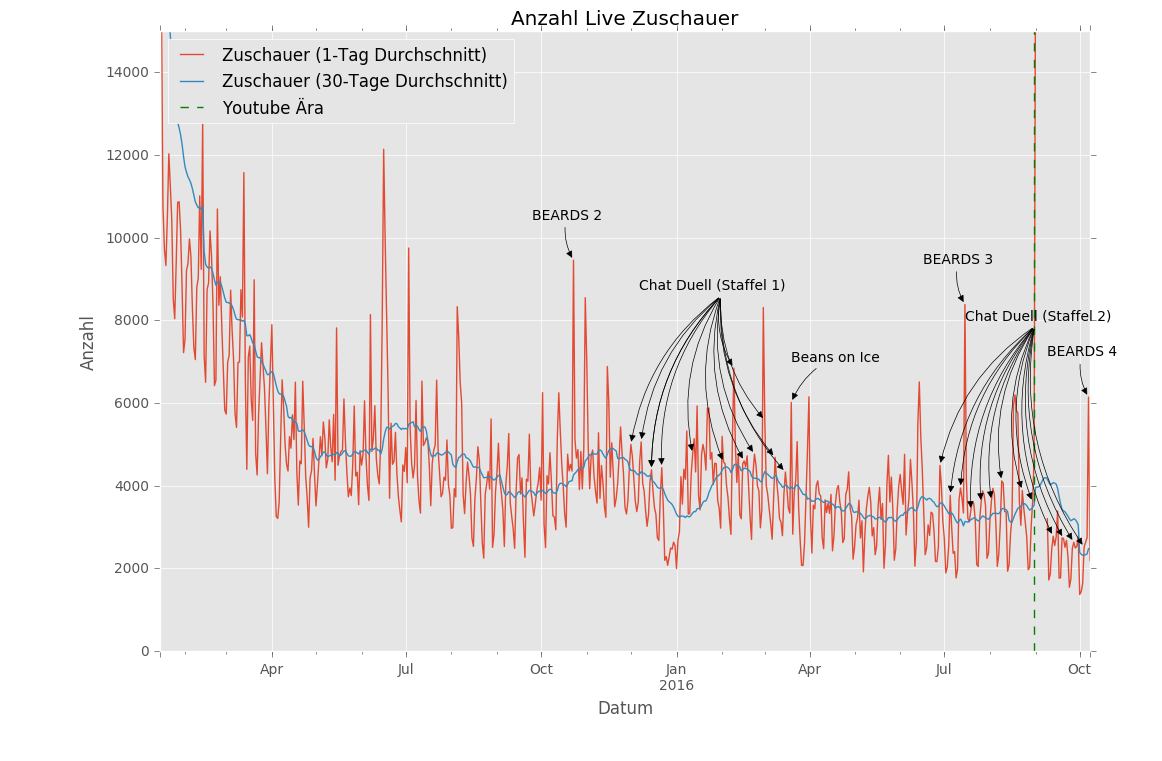

In [11]:
plot = joinedChatData[['viewers', 'viewers_30d_mean']].plot(figsize=(12, 8), title='Anzahl Live Zuschauer')
plot.set_xlabel('Datum')
plot.set_ylabel('Anzahl')

plot.axvline(datetime.datetime(2016, 8, 31, 23, 59, 59), color='g', linestyle='--', label='Youtube Ära')

legend = plot.legend(loc=2)
legend.get_texts()[0].set_text('Zuschauer (1-Tag Durchschnitt)')
legend.get_texts()[1].set_text('Zuschauer (30-Tage Durchschnitt)')

plt.ylim(ymin=0)
plt.ylim(ymax=15000)

arrowStyle = dict(arrowstyle="-|>",
                  connectionstyle='arc3,rad=0.2',
                  linewidth = 0.5,
                  color = 'black')

#annotate chat duell (season 1)
plot.annotate('Chat Duell (Staffel 1)', xy=(0.55, 0.62), xycoords='figure fraction')
for date in chatDuellDates1:
    datapoint = joinedChatData.loc[date]
    plot.annotate('', 
                  xy=(date, datapoint['viewers']), xycoords='data', 
                  xytext=(0.62, 0.61), textcoords='figure fraction',
                  arrowprops=arrowStyle)

#annotate chat duell (season 2)
plot.annotate('Chat Duell (Staffel 2)', xy=(0.83, 0.58), xycoords='figure fraction')
for date in chatDuellDates2:
    datapoint = joinedChatData.loc[date]
    plot.annotate('', 
                  xy=(date, datapoint['viewers']), xycoords='data', 
                  xytext=(0.89, 0.57), textcoords='figure fraction',
                  arrowprops=arrowStyle)

#annotate beans on rice
date = '2016-03-19'
datapoint = joinedChatData.loc[date]
plot.annotate('Beans on Ice', 
              xy=(date, datapoint['viewers']), xycoords='data', 
              xytext=(0, 30), textcoords='offset points',
              arrowprops=arrowStyle)

#annotate beards
date = '2015-10-23'
datapoint = joinedChatData.loc[date]
plot.annotate('BEARDS 2', 
              xy=(date, datapoint['viewers']), xycoords='data', 
              xytext=(-30, 30), textcoords='offset points',
              arrowprops=arrowStyle)

date = '2016-07-15'
datapoint = joinedChatData.loc[date]
plot.annotate('BEARDS 3', 
              xy=(date, datapoint['viewers']), xycoords='data', 
              xytext=(-30, 30), textcoords='offset points',
              arrowprops=arrowStyle)

date = '2016-10-07'
datapoint = joinedChatData.loc[date]
plot.annotate('BEARDS 4', 
              xy=(date, datapoint['viewers']), xycoords='data', 
              xytext=(-30, 30), textcoords='offset points',
              arrowprops=arrowStyle)

plot

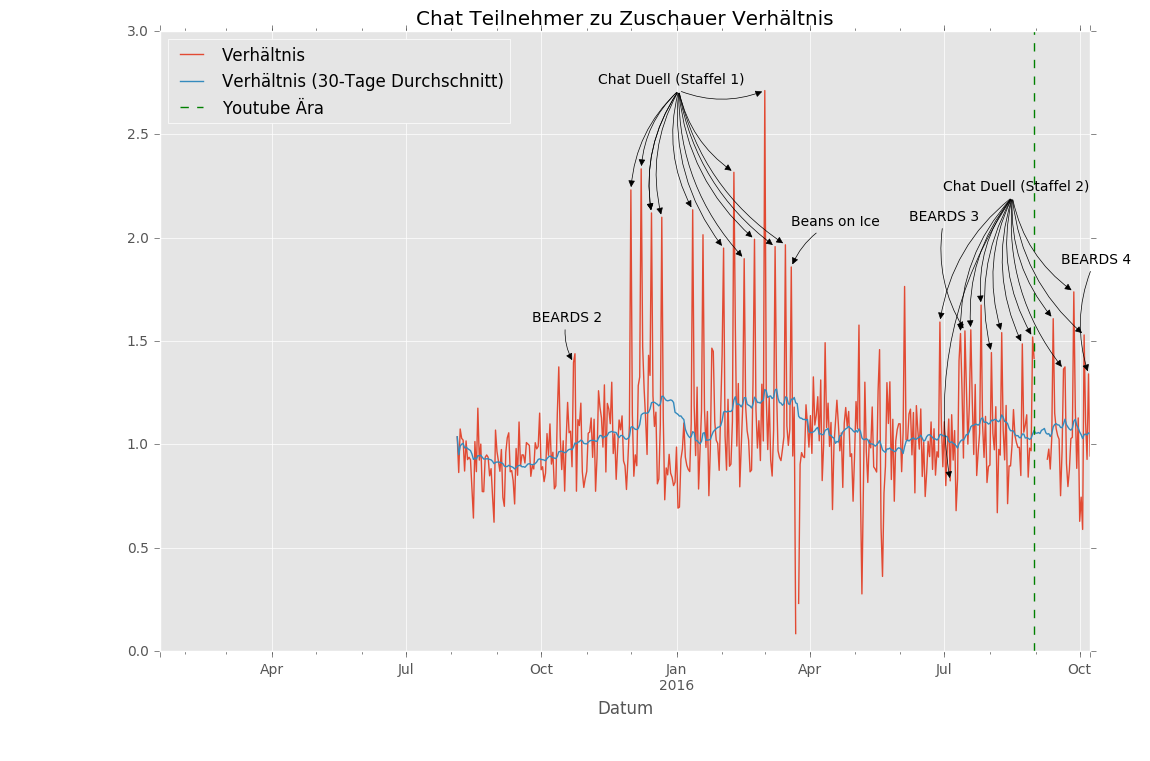

In [12]:
plot = joinedChatData[['ratio', 'ratio_30d_mean']].plot(figsize=(12, 8), title='Chat Teilnehmer zu Zuschauer Verhältnis')
plot.set_xlabel('Datum')

plot.axvline(datetime.datetime(2016, 8, 31, 23, 59, 59), color='g', linestyle='--', label='Youtube Ära')

legend = plot.legend(loc=0)
legend.get_texts()[0].set_text('Verhältnis')
legend.get_texts()[1].set_text('Verhältnis (30-Tage Durchschnitt)')

plt.ylim(ymin=0)

arrowStyle = dict(arrowstyle="-|>",
                  connectionstyle='arc3,rad=0.2',
                  linewidth = 0.5,
                  color = 'black')

#annotate chat duell (season 1)
plot.annotate('Chat Duell (Staffel 1)', xy=(0.52, 0.89), xycoords='figure fraction')
for date in chatDuellDates1:
    datapoint = joinedChatData.loc[date]
    plot.annotate('', 
                  xy=(date, datapoint['ratio']), xycoords='data', 
                  xytext=(0.59, 0.88), textcoords='figure fraction',
                  arrowprops=arrowStyle)

#annotate chat duell (season 2)
plot.annotate('Chat Duell (Staffel 2)', xy=(0.82, 0.75), xycoords='figure fraction')
for date in chatDuellDates2:
    datapoint = joinedChatData.loc[date]
    plot.annotate('', 
                  xy=(date, datapoint['ratio']), xycoords='data', 
                  xytext=(0.88, 0.74), textcoords='figure fraction',
                  arrowprops=arrowStyle)

#annotate beans on rice
date = '2016-03-19'
datapoint = joinedChatData.loc[date]
plot.annotate('Beans on Ice', 
              xy=(date, datapoint['ratio']), xycoords='data', 
              xytext=(0, 30), textcoords='offset points',
              arrowprops=arrowStyle)

#annotate beards
date = '2015-10-23'
datapoint = joinedChatData.loc[date]
plot.annotate('BEARDS 2', 
              xy=(date, datapoint['ratio']), xycoords='data', 
              xytext=(-30, 30), textcoords='offset points',
              arrowprops=arrowStyle)

date = '2016-07-15'
datapoint = joinedChatData.loc[date]
plot.annotate('BEARDS 3', 
              xy=(date, datapoint['ratio']), xycoords='data', 
              xytext=(-40, 80), textcoords='offset points',
              arrowprops=arrowStyle)

date = '2016-10-07'
datapoint = joinedChatData.loc[date]
plot.annotate('BEARDS 4', 
              xy=(date, datapoint['ratio']), xycoords='data', 
              xytext=(-20, 80), textcoords='offset points',
              arrowprops=arrowStyle)

plot